# 피마pima 인디언 당뇨병+추가callbacks+history

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# 실행할때마다 같은 결과를 출력하기 위한 seed값설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터전처리

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
Data_set = np.loadtxt(filename, delimiter=",")
Data_set[:3, :] #pima-indians-diabetes.csv

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ,   1.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(Data_set[:, :-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, Data_set[:, -1], stratify=Data_set[:, -1], random_state=seed
)
X_train.shape, X_test.shape
#결과값 ((576, 8), (192, 8))

((576, 8), (192, 8))

### 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', #이진분류니까
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델저장관련 환경설정
import os #디렉토리명령어
MODEL_DIR = './model/' #모델디렉토리
if not os.path.exists(MODEL_DIR):#없으면만들어라
    os.mkdir(MODEL_DIR)

In [ ]:
!ls -l

total 32
drwxr-xr-x 2 root root  4096 Feb 10 04:44 model
-rw-r--r-- 1 root root 23279 Feb 10 04:42 pima-indians-diabetes.csv
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data


In [ ]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
#monitor='val_loss' 4가지중선택가능
#verbose=1 최소한보여줌/ 0안보여줌/ 2다보여줌
#save_best_only=True 물어보고이전보다좋으면저장, 아니면 모두다저장함;
# 자동 중단 설정

In [ ]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=50,
                    verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.61408, saving model to ./model/best001-0.6141.hdf5

Epoch 00002: val_loss improved from 0.61408 to 0.59672, saving model to ./model/best002-0.5967.hdf5

Epoch 00003: val_loss improved from 0.59672 to 0.58231, saving model to ./model/best003-0.5823.hdf5

Epoch 00004: val_loss improved from 0.58231 to 0.57177, saving model to ./model/best004-0.5718.hdf5

Epoch 00005: val_loss improved from 0.57177 to 0.56351, saving model to ./model/best005-0.5635.hdf5

Epoch 00006: val_loss improved from 0.56351 to 0.55622, saving model to ./model/best006-0.5562.hdf5

Epoch 00007: val_loss improved from 0.55622 to 0.55095, saving model to ./model/best007-0.5510.hdf5

Epoch 00008: val_loss improved from 0.55095 to 0.54692, saving model to ./model/best008-0.5469.hdf5

Epoch 00009: val_loss improved from 0.54692 to 0.54331, saving model to ./model/best009-0.5433.hdf5

Epoch 00010: val_loss improved from 0.54331 to 0.53953, saving model to ./model/best010-0.5395

In [ ]:
#잘못된평가? 베스트모델로한것이아님
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')
# 그냥0.8073, callbacks추가하고0.7865 왜 떨어졌지

6/6 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7865
Accuracy: 0.7865


In [ ]:
#베스트모델로평가해도 0.7865 같다
from tensorflow.keras.models import load_model

best_model = load_model('./model/best018-0.5261.hdf5') 
acc = best_model.evaluate(X_test, y_test) 
print(f'Accuracy: {acc[1]:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7865
Accuracy: 0.7865


### 학습과정시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_vloss=history.history['val_loss'] # y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_acc=history.history['accuracy'] # y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_vacc=history.history['val_accuracy']
y_loss=history.history['loss']

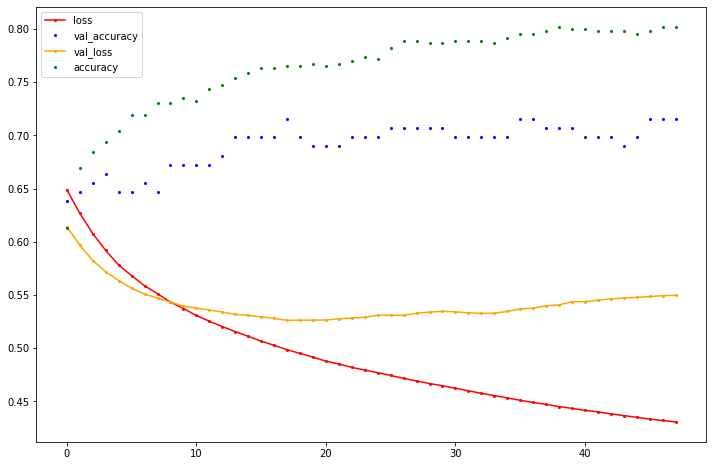

In [ ]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o-", c="red", markersize=2, label='loss')
plt.plot(x_len, y_vacc, "o", c="blue", markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "o-", c="orange", markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "o", c="green", markersize=2, label='accuracy')
plt.legend()
plt.show()